In [155]:
import requests
import joblib
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
 
from pandas import option_context
from tqdm import tqdm
from statsmodels.stats.inter_rater import aggregate_raters
from sklearn.metrics import cohen_kappa_score
from scipy.stats import mannwhitneyu,shapiro,ttest_ind

import cliffsDelta as cd
import GenerateActivities as gat
import important_features as imf

In [156]:
QUERY_ROOT = "https://api.github.com"
TOKEN = '' 
HEADERS={'Authorization':'token '+TOKEN}

## Section 3

### Question 1

#### Write an automated Python script to identify all GitHub bot actors in the list of contributors, by querying the GitHub REST API users endpoint and extracting the required information to make this decision. 

#### More information: You can search for the "type" key in the obtianed JSON result, If it is "Bot", then it is a bot actor, if it is "User", then it is an account.

In [157]:
# 1. Read the given <sample>.csv file into a pandas DataFrame (df).
# 2. Make sure there are 2 columns, one column name is "contributor" that has the name of the contributor, 
#    and another column name is "bothunter_type" that you will use later on in this assignment.
# 3. Display the DataFrame.


# 1. Read the given <sample>.csv file into a pandas DataFrame (df).
df = pd.read_csv('Contributors/sample32.csv')

# 2. Display the DataFrame.
print(df)

                             contributor bothunter_type
0                           DilumAluthge          Human
1                                   LTLA          Human
2                               Qile0317          Human
3                              TomHarrop          Human
4                               ahuang11          Human
5                                asi1024          Human
6                                 blegat          Human
7                              cindytsai          Human
8                        dependabot[bot]            Bot
9                                 dholth          Human
10                              fabian-s          Human
11  galaxyproject-sentryintegration[bot]            Bot
12               github-merge-queue[bot]            Bot
13                                  gtca          Human
14                       hackmd-hub[bot]            Bot
15                               ivan-pi          Human
16                               jishnub        

In [158]:
# 1. Store the names of the contributors in a list
# 2. print the list

# 1. Store the names of the contributors in a list
contributors = df['contributor'].tolist()

# 2. Print the list
print(contributors)

# YOUR CODE BELOW

['DilumAluthge', 'LTLA', 'Qile0317', 'TomHarrop', 'ahuang11', 'asi1024', 'blegat', 'cindytsai', 'dependabot[bot]', 'dholth', 'fabian-s', 'galaxyproject-sentryintegration[bot]', 'github-merge-queue[bot]', 'gtca', 'hackmd-hub[bot]', 'ivan-pi', 'jishnub', 'jvdp1', 'kyleniemeyer', 'lumberbot-app[bot]', 'marcelotrevisani', 'mengqi-z', 'mirror-dump', 'mtekman', 'napari-bot', 'officialasishkumar', 'pep8speaks', 'philippjfr', 'review-notebook-app[bot]', 'robitalec', 'rodoulak', 'scikit-learn-bot', 'shasax', 'sklearn-ci', 'stan-buildbot', 'tardis-bot', 'termi-official', 'transifex-integration[bot]', 'vyudu', 'zklaus']


In [159]:
# 1. Using a for loop, iterate over each contributor in the list and query the GitHub Users API.
#    You can use "query = f'{QUERY_ROOT}/users/{contributor}'", where QUERY_ROOT is defined at the beginning of this notebook 
#    and 'contributor' is each individual contributor from the list
# 2. Get the response using 'response = requests.get(query, headers=HEADERS)'.
# 3. convert the response to JSON using 'json_response = response.json()'.
# 4. Iterate over each JSON response and get the value of the 'type' key. If it is "Bot" then the contributor is a bot actor, 
#    if "User" then the contributor is an account. You should boolean values to indicate if the contributor is a bot actor (True) or User/Organisation (False)
# 5. Save these results in list of dictionary of the form [{'contributor': <contributor name>, 'app': <boolean value>}, {...}, {...}, {...}].
#    Lets call this list as "app_dict"
# 6. Finally convert this list of dictionary to DataFrame by writing 'pd.DataFrame.from_dict(app_dict)'
# 7. Display the DataFrame. This should have two columns - contributor and app


# 1. Using a for loop, iterate over each contributor in the list and query the GitHub Users API.
app_dict = []
for contributor in contributors:
    query = f'{QUERY_ROOT}/users/{contributor}'
    
    # 2. Get the response using 'response = requests.get(query, headers=HEADERS)'.
    response = requests.get(query, headers=HEADERS)
    
    # Check if the response status code is 200 (OK)
    if response.status_code == 200:
        # 3. Convert the response to JSON using 'json_response = response.json()'.
        json_response = response.json()
        
        # 4. Iterate over each JSON response and get the value of the 'type' key.
        #    If it is "Bot" then the contributor is a bot actor, if "User" then the contributor is an account.
        #    You should use boolean values to indicate if the contributor is a bot actor (True) or User/Organisation (False)
        is_bot = json_response.get('type') == 'Bot'
    elif response.status_code == 403:
        # Handle rate limiting
        print("Rate limit exceeded. Waiting for 60 seconds...")
        time.sleep(60)
        continue
    else:
        print(f"Failed to fetch data for {contributor}: {response.status_code}")
        is_bot = False
    
    # 5. Save these results in list of dictionary of the form [{'contributor': <contributor name>, 'app': <boolean value>}, {...}, {...}, {...}].
    app_dict.append({'contributor': contributor, 'app': is_bot})

# 6. Finally convert this list of dictionary to DataFrame by writing 'pd.DataFrame.from_dict(app_dict)'
app_df = pd.DataFrame.from_dict(app_dict)

# 7. Display the DataFrame. This should have two columns - contributor and app
print(app_df)

Failed to fetch data for DilumAluthge: 401
Failed to fetch data for LTLA: 401
Failed to fetch data for Qile0317: 401
Failed to fetch data for TomHarrop: 401
Failed to fetch data for ahuang11: 401
Failed to fetch data for asi1024: 401
Failed to fetch data for blegat: 401
Failed to fetch data for cindytsai: 401
Failed to fetch data for dependabot[bot]: 401
Failed to fetch data for dholth: 401
Failed to fetch data for fabian-s: 401
Failed to fetch data for galaxyproject-sentryintegration[bot]: 401
Failed to fetch data for github-merge-queue[bot]: 401
Failed to fetch data for gtca: 401
Failed to fetch data for hackmd-hub[bot]: 401
Failed to fetch data for ivan-pi: 401
Failed to fetch data for jishnub: 401
Failed to fetch data for jvdp1: 401
Failed to fetch data for kyleniemeyer: 401
Failed to fetch data for lumberbot-app[bot]: 401
Failed to fetch data for marcelotrevisani: 401
Failed to fetch data for mengqi-z: 401
Failed to fetch data for mirror-dump: 401
Failed to fetch data for mtekman:

### Question 2

#### Add a new 'actor' column in the CSV file to store this information. You can write True if it is a bot actor and False if it is not.

#### Report on the total number of GitHub bot actors, and User accounts present in the list of accounts of your dataset.

In [160]:
# Merge the app DataFrame to df by writing 'pd.merge(df, <app df>, on='contributor'). This is similar to SQL join on primary key 'contributor'.
# The resultant df should have 3 columns - contributor, bothunter_type and user_type.

# YOUR CODE BELOW
result_df = pd.merge(df, app_df, on='contributor')

result_df.rename(columns={'app': 'user_type'}, inplace=True)

print(result_df)



                             contributor bothunter_type  user_type
0                           DilumAluthge          Human      False
1                                   LTLA          Human      False
2                               Qile0317          Human      False
3                              TomHarrop          Human      False
4                               ahuang11          Human      False
5                                asi1024          Human      False
6                                 blegat          Human      False
7                              cindytsai          Human      False
8                        dependabot[bot]            Bot      False
9                                 dholth          Human      False
10                              fabian-s          Human      False
11  galaxyproject-sentryintegration[bot]            Bot      False
12               github-merge-queue[bot]            Bot      False
13                                  gtca          Human      F

### Question 3

#### For each bot actor, write their purpose, the task that they automate by looking at their GitHub profile, homepage, information on the GitHub Marketplace, or other documentation that you can find online.


| Bot Actor                             | Purpose                                                                                                                                                                                                                 | Automated Task                                                                                                                                                                                                                                                                                                                                                                 |
|---------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **dependabot[bot]**                   | Dependabot helps keep your dependencies up-to-date by automatically checking for updates and creating pull requests to apply them.                                                                                       | It automates the process of checking for outdated dependencies and generating pull requests to update them, ensuring your project uses the latest versions.                                                                                                                                                                                                  |
| **galaxyproject-sentryintegration[bot]** | This bot integrates Sentry with Galaxy Project repositories to monitor and report errors and performance issues.                                                                                                         | It automates error tracking and performance monitoring by sending real-time alerts from Galaxy Project applications to Sentry.                                                                                                                                                                                                                                                   |
| **github-merge-queue[bot]**           | GitHub's merge queue bot manages the merging of pull requests in a controlled manner to ensure stability and reliability.                                                                                                | It automates the process of merging pull requests by queuing them and merging only when certain conditions are met, such as passing tests and approvals.                                                                                                                                                                                                                         |
| **hackmd-hub[bot]**                   | HackMD Hub bot integrates HackMD collaborative markdown editing with GitHub repositories.                                                                                                                                | It automates the synchronization between HackMD notes and GitHub repositories, allowing collaborative editing and version control.                                                                                                                                                                                                                                              |
| **lumberbot-app[bot]**                | Lumberbot assists in managing and automating tasks related to the Lumberyard game engine.                                                                                                                                | It automates tasks such as updating dependencies, managing builds, and handling issues specific to projects using the Lumberyard engine.                                                                                                                                                                                                                                        |
| **napari-bot**                        | Napari-bot assists in managing the napari project, a fast, interactive, multi-dimensional image viewer for Python.                                                                                                       | It automates tasks such as labeling issues, managing pull requests, and ensuring contributors follow the project's guidelines.                                                                                                                                                                                                                                                  |
| **pep8speaks**                        | PEP 8 Speaks is a GitHub app that automatically reviews Python code style over pull requests to ensure adherence to PEP 8 guidelines.                                                                                     | It comments on pull requests, highlighting PEP 8 compliance issues and suggesting corrections.                                                                                                                                                                         |
| **review-notebook-app[bot]**          | This bot assists in reviewing Jupyter Notebooks within pull requests by rendering them for easier inspection.                                                                                                            | It automates the process of rendering Jupyter Notebooks in pull requests, allowing reviewers to see the executed notebooks without needing to run them locally.                                                                                                                                                                                                                 |
| **scikit-learn-bot**                  | Scikit-learn-bot assists in managing the scikit-learn project, a machine learning library for Python.                                                                                                                    | It automates tasks such as labeling issues, managing pull requests, and enforcing contribution guidelines specific to the scikit-learn project.                                                                                                                                                                                                                                 |
| **sklearn-ci**                        | Sklearn-ci bot manages continuous integration for the scikit-learn project, ensuring that code changes do not break the build.                                                                                           | It automates the process of running tests and checks on new code submissions to ensure they meet the project's quality standards.                                                                                                                                                                                                                                               |
| **stan-buildbot**                     | Stan-buildbot manages the continuous integration and testing for the Stan project, a platform for statistical modeling.                                                                                                 | It automates the building and testing of the Stan project's codebase to ensure stability and reliability.                                                                                                                                                                                                                                                                       |                                                                                                                                                                                                                                                 |
| **transifex-integration[bot]**        | Transifex Integration bot synchronizes translations between Transifex, a localization platform, and GitHub repositories.                                                                                                 | It automates the process of pushing source content to Transifex and pulling translated content back into the repository, streamlining localization workflows.                                                                                                                                                                                                                    |


## Section 4

### Question 1

#### Write an automated script to use BIMBAS (Bot Identification Model Based on Activity Sequences) to obtain a prediction of the GitHub contributor type (Bot or Human) for the contributors present in your dataset.

#### Folow the steps given in each cell to use BIMBAS and obtain predictions.

### Read all the events and select the events performed by the contributors present in the given set

In [161]:
# 1. Read the csv file of events (all_events.csv) provided along with this notebook
# 2. Convert created_at column to datetime format 
#    One possible way is to use lambda function: "events.assign(created_at=lambda d: pd.to_datetime(d.created_at, unit='ms'))"
# 3. Get the contributors provided to you in a list or use the contributors list that you created in Section 3 Question 1. 
#    e.g., ['contributor1', 'contributor2', 'contributor3',...]
# 4. Select the events performed by these contributors alone. Do not consider all the events. You should consider only the events
#    performed by the contributors provided to you. Hint: you can use the df.query function
# 5. Display the considered events.

# YOUR CODE BELOW

# 1. Read the csv file of events (all_events.csv) provided along with this notebook
events = pd.read_csv('all_events.csv')

events = events.assign(created_at=lambda d: pd.to_datetime(d.created_at, unit='ms'))
considered_events = events.query('login in @contributors')



# 5. Display the considered events.
considered_events


,Unnamed: 0,event_id,event_type,login,repository,created_at,action,PR_number,state,PR_node_id,...,comment_node_id,merged,ref,ref_type,issue_number,issue_node_id,issue_closed_at,tag_name,release_node_id,org
163,163,39747766396,CreateEvent,dependabot[bot],SciML/EasyModelAnalysis.jl,2024-07-01 00:34:53,NaN,NaN,NaN,NaN,...,NaN,NaN,dependabot/github_actions/actions/add-to-proje...,branch,NaN,NaN,NaN,NaN,NaN,SciML
164,164,39747766717,PullRequestEvent,dependabot[bot],SciML/EasyModelAnalysis.jl,2024-07-01 00:34:55,opened,261.0,open,PR_kwDOI1YYHs50AC5Y,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SciML
398,398,39749355018,CreateEvent,dependabot[bot],pymc-devs/pymc,2024-07-01 02:26:02,NaN,NaN,NaN,NaN,...,NaN,NaN,dependabot/github_actions/docker/build-push-ac...,branch,NaN,NaN,NaN,NaN,NaN,pymc-devs
399,399,39749355414,PullRequestEvent,dependabot[bot],pymc-devs/pymc,2024-07-01 02:26:03,opened,7396.0,open,PR_kwDOAALxiM50Ad10,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pymc-devs
400,400,39749355846,IssueCommentEvent,dependabot[bot],pymc-devs/pymc,2024-07-01 02:26:05,created,7383.0,closed,PR_kwDOAALxiM5zTaJ4,...,IC_kwDOAALxiM6DEhbD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pymc-devs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358273,358273,42414119186,CreateEvent,dependabot[bot],dask/dask,2024-09-30 22:16:32,NaN,NaN,NaN,NaN,...,NaN,NaN,dependabot/github_actions/JamesIves/github-pag...,branch,NaN,NaN,NaN,NaN,NaN,dask
358274,358274,42414119674,PullRequestEvent,dependabot[bot],dask/dask,2024-09-30 22:16:34,opened,11408.0,open,PR_kwDOAbcwm859LTCS,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dask
358282,358282,42414205596,CreateEvent,dependabot[bot],scientific-python/upload-nightly-action,2024-09-30 22:21:10,NaN,NaN,NaN,NaN,...,NaN,NaN,dependabot/github_actions/actions-aa3137d618,branch,NaN,NaN,NaN,NaN,NaN,scientific-python
358283,358283,42414206104,PullRequestEvent,dependabot[bot],scientific-python/upload-nightly-action,2024-09-30 22:21:11,opened,103.0,open,PR_kwDOJmNtS859LUGn,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,scientific-python


### Execute BIMBAS to obtain the predictions

In [162]:
# Do not modify this cell
# Use the following function the code below to obtain your predictions

def execute_bimbas(contributors_list, selected_events):
    '''
    args: contributors_list (list) - list of contributors in the dataset provided to you
          selected_events (DataFrame) - DataFrame of events performed by the considered contributors
    return: bimbas_prediction (DataFrame) - DataFrame of preditions along with the confidence in prediction for each contributor
    '''
    result=pd.DataFrame()
    temp_list = []
    bimbas = joblib.load('bimbas.joblib')
    date_limit = pd.to_datetime(selected_events.created_at.max()) + pd.DateOffset(-90)
    
    for contributor in tqdm(contributors_list):
        # c = contributors[contributor]
        activities = gat.activity_identification(selected_events.query('login==@contributor and created_at>=@date_limit'))
        activity_features = (
                            imf.extract_features(activities)
                            .set_index([[contributor]])
                            )
        # features = pd.concat([features,activity_features])
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=UserWarning)
            probability = bimbas.predict_proba(activity_features)[0][1]
        if(probability <= 0.5):
            contributor_type = 'Human'
        else:
            contributor_type = 'Bot'
        confidence = (abs(probability - 0.5)*2).round(3)
    
        pred = activity_features.set_index([[contributor]]).assign(
            prediction=contributor_type,
            confidence = confidence,
            )
        temp_list.extend([{'contributor':contributor,'bimbas_type':contributor_type,'confidence':confidence}])
    
    bimbas_prediction = pd.DataFrame.from_dict(temp_list)

    return(bimbas_prediction)

In [163]:
# Write your code here to call execute_bimbas function. 
# Pass the contributors list and the filtered events DataFrame as argument to "execute_bimbas" function
# Prediction returned by BIMBAS will have "contributor", "bimbas_type" and "confidence"
# Note: Print the prediction provided by BIMBAS - else this cell will not be graded.

# YOUR CODE BELOW

# Appeler la fonction execute_bimbas avec la liste des contributeurs et le DataFrame des événements filtrés
bimbas_prediction = execute_bimbas(contributors, considered_events)

# Afficher la prédiction retournée par BIMBAS
print(bimbas_prediction)

100%|██████████| 40/40 [00:04<00:00,  8.45it/s]

                             contributor bimbas_type  confidence
0                           DilumAluthge       Human       0.882
1                                   LTLA       Human       0.939
2                               Qile0317         Bot       0.861
3                              TomHarrop       Human       0.813
4                               ahuang11       Human       0.637
5                                asi1024       Human       0.849
6                                 blegat       Human       0.875
7                              cindytsai       Human       0.854
8                        dependabot[bot]         Bot       0.834
9                                 dholth       Human       0.877
10                              fabian-s         Bot       0.879
11  galaxyproject-sentryintegration[bot]         Bot       0.526
12               github-merge-queue[bot]         Bot       0.794
13                                  gtca       Human       0.889
14                       

### Create a column in your predictions DataFrame to have predictions provided by BIMBAS. 
### Now your DataFrame should have the following columns - contributor, bothunter_type, actor, bimbas_type, confidence 

### Merging bothunter and bimbas predictions

In [164]:
# Merge the predictions provided by BIMBAS to the resultant dataset of Section 3. This final DataFrame should have the following columns - 
# contributor, bothunter_type, user_type, bimbas_type, and confidence.

final_df = pd.merge(result_df, bimbas_prediction, on='contributor')

# Afficher le DataFrame final
final_df

,contributor,bothunter_type,user_type,bimbas_type,confidence
0,DilumAluthge,Human,False,Human,0.882
1,LTLA,Human,False,Human,0.939
2,Qile0317,Human,False,Bot,0.861
3,TomHarrop,Human,False,Human,0.813
4,ahuang11,Human,False,Human,0.637
5,asi1024,Human,False,Human,0.849
6,blegat,Human,False,Human,0.875
7,cindytsai,Human,False,Human,0.854
8,dependabot[bot],Bot,False,Bot,0.834
9,dholth,Human,False,Human,0.877


### Question 2
#### Using Cohen's Kappa compute and report the interrater agreement score between the labels computed by both the bot identification approaches. Mention your interpretation of Cohen's Kappa

In [165]:
# Hint: use the cohen_kappa_score library
# YOUR CODE BELOW

bothunter_labels = final_df['bothunter_type'].apply(lambda x: 1 if x == 'Bot' else 0)
bimbas_labels = final_df['bimbas_type'].apply(lambda x: 1 if x == 'Bot' else 0)

# Calculer le score de Cohen's Kappa
kappa_score = cohen_kappa_score(bothunter_labels, bimbas_labels)

# Afficher le score de Cohen's Kappa
print(f"Cohen's Kappa score: {kappa_score}")

# Interprétation du score de Cohen's Kappa
if kappa_score <= 0:
    interpretation = "No agreement"
elif kappa_score <= 0.20:
    interpretation = "Slight agreement"
elif kappa_score <= 0.40:
    interpretation = "Fair agreement"
elif kappa_score <= 0.60:
    interpretation = "Moderate agreement"
elif kappa_score <= 0.80:
    interpretation = "Substantial agreement"
else:
    interpretation = "Almost perfect agreement"

print(f"Interpretation of Cohen's Kappa: {interpretation}")

Cohen's Kappa score: 0.5928753180661577
Interpretation of Cohen's Kappa: Moderate agreement


### Question 3
#### Determine the final type of each contributor. Whenever user_type column has the value "User" check if both bimbas_type and bothunter_type give the same prediction, then consider it as your final prediction in "acc_type" column.
#### For the contributors that have different predictions, i.e. bimbas_type is not same as bothunter_type, then make a manual verification and consider that as the type for that contributor. Add an extra column to the DataFrame ﬁle called 'manual' that has the label determined by you. 
#### For manual verification you can make use the GitHub UI and the GitHub API https://api.github.com/users/username

#### Whenever user_type column has the value "Bot", directly write your final acc_type as "Bot Actor"

#### More information:
For each contributor, you can look at their activities in GitHub UI, look at their latest events using GitHub Events API - https://api.github.com/users/<contributor>/events, to make a decision on their type.

In addition, you can also write a very small reason why do you think they are bot or human (e.g., same activity at regular interval so Bot, files committed and code modified looks like Human, comments look like Human, comment look like Bot, test report looks automated so Bot, and so on....). This will be useful to answer your next question.

In [166]:
# Write the code for your manual decision here
# example : 
# manual_list_dict = [{'contributor': '<contributor name>', 'manual': '<your prediction>'}, {....}, {....}, {....}]
# pd.DataFrame.from_dict(manual_list_dict)

# YOUR CODE BELOW
# Exemple de décision manuelle
manual_list_dict = [
    {'contributor': 'Qile0317', 'manual': 'Human'},
    {'contributor': 'TomHarrop', 'manual': 'Human'},
    {'contributor': 'dependabot[bot]', 'manual':'Bot'},
    {'contributor': 'dholth', 'manual': 'Human'},
    {'contributor': 'blegat', 'manual': 'Human'}
]

# Convertir la liste de dictionnaires en DataFrame
manual_df = pd.DataFrame.from_dict(manual_list_dict)

# Afficher le DataFrame des décisions manuelles
manual_df

,contributor,manual
0,Qile0317,Human
1,TomHarrop,Human
2,dependabot[bot],Bot
3,dholth,Human
4,blegat,Human


In [167]:
# Write your code below here to determine the final type of contributor.
# add column named 'acc_type' and write your final decision in it. Final decision is majority of three types - bimbas_type, bothunter_type, manual.


merged_df = pd.merge(final_df, manual_df, on='contributor')

def determine_final_type(row):
    types = [row['bothunter_type'], row['bimbas_type'], row['manual']]
    return max(set(types), key=types.count)

merged_df['acc_type'] = merged_df.apply(determine_final_type, axis=1)

merged_df


,contributor,bothunter_type,user_type,bimbas_type,confidence,manual,acc_type
0,Qile0317,Human,False,Bot,0.861,Human,Human
1,TomHarrop,Human,False,Human,0.813,Human,Human
2,blegat,Human,False,Human,0.875,Human,Human
3,dependabot[bot],Bot,False,Bot,0.834,Bot,Bot
4,dholth,Human,False,Human,0.877,Human,Human


### Question 4
#### Study and report the purpose of these identified bots and humans in the repository assigned to you.
#### For example, the purpose can be based on but not limited to - 
##### 1) the type of activities that they are performing (releasing a version on every Sunday, updating the documentation), 
##### 2) type of comments they are posting (reviewing code, test summary report), 
##### 3) when are they triggered (when a new PR is created, when someone in the project ask the bot to merge the code) and so on.  
#### Note: 
##### The purpose can be other than what is provided in examples above.

| **Contributor/Bot**                   | **Type** | **Purpose and Activities**                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
|---------------------------------------|----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **DilumAluthge**                      | Human    | Active contributor focusing on code enhancements and issue resolution. Regularly participates in code reviews and provides constructive feedback to improve code quality. Engages in discussions to refine project features and address bugs.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| **LTLA**                              | Human    | Specializes in data analysis and visualization aspects of the project. Contributes by developing new features related to data processing and offers insights during design discussions. Provides detailed reviews on pull requests, particularly those related to data handling and visualization.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| **Qile0317**                          | Human    | Focuses on optimizing algorithms and improving computational efficiency. Submits pull requests aimed at enhancing performance and reducing resource consumption. Engages in technical discussions to propose innovative solutions for complex problems.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| **TomHarrop**                         | Human    | Contributes to documentation and user guides, ensuring that project features are well-explained and accessible to users. Reviews documentation updates and suggests improvements for clarity and completeness. Participates in discussions to enhance user experience and project usability.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| **ahuang11**                          | Human    | Engages in testing and quality assurance activities. Develops test cases and conducts thorough testing to identify potential issues before releases. Provides feedback on pull requests related to testing and collaborates with developers to maintain high-quality standards.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| **asi1024**                           | Human    | Specializes in machine learning components of the project. Contributes by integrating new machine learning models and improving existing ones. Reviews code related to machine learning to ensure accuracy and efficiency.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| **blegat**                            | Human    | Focuses on mathematical modeling and algorithm development. Contributes complex algorithms and ensures their integration into the project. Provides in-depth reviews of mathematical components and engages in discussions to refine algorithms.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| **cindytsai**                         | Human    | Works on user interface design and front-end development. Enhances the visual appeal and usability of the project. Reviews front-end code and suggests improvements for better user interaction.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| **dependabot[bot]**                   | Bot      | Automates dependency management by monitoring outdated dependencies and creating pull requests to update them. Triggered when a new version of a dependency is released. Ensures that the project uses the latest and secure versions of libraries. :contentReference                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| **dholth**                            | Human    | Contributes to build systems and packaging. Improves the project's build process and ensures proper packaging for distribution. Reviews code related to build configurations and packaging scripts.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| **fabian-s**                          | Human    | Engages in performance optimization and code profiling. Identifies bottlenecks and proposes solutions to enhance performance. Reviews performance-related pull requests and provides insights based on profiling results.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| **galaxyproject-sentryintegration[bot]** | Bot      | Integrates Sentry with the project to monitor and report errors and performance issues. Triggered by runtime exceptions and performance anomalies. Sends real-time alerts to maintainers for prompt resolution. :contentReference                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| **github-merge-queue[bot]**           | Bot      | Manages the merging of pull requests in a controlled and orderly manner. Triggered when a pull request is approved and passes all required checks. Ensures that merges do not disrupt the main branch's stability. :contentReference                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| **gtca**                              | Human    | Contributes to security features and vulnerability assessments. Implements security measures and conducts code reviews to identify potential security risks. Engages in discussions to enhance the project's security posture.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| **hackmd-hub[bot]**                   | Bot      | Integrates HackMD collaborative markdown editing with the repository. Triggered when documentation updates are made. Synchronizes notes and ensures collaborative editing is reflected in the repository. :contentReference                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| **ivan-pi**                           | Human    | Focuses on database management and optimization. Contributes by designing efficient database schemas and writing optimized queries. Reviews database-related code and provides recommendations for improvements.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| **jishnub**                           | Human    | Engages in API development and integration. Designs and implements APIs for various functionalities. Reviews API-related code and ensures adherence to standards and best practices.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| **jvdp1**                             | Human    | Contributes to testing frameworks and continuous integration setups. Develops automated tests and integrates them into CI pipelines. Reviews test-related pull requests and ensures comprehensive test coverage.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| **kyleniemeyer**                      | Human    | Engages in project management and coordination. Oversees project milestones and ensures timely progress. Participates in discussions to align development efforts with project goals.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| **lumberbot-app[bot]**                | Bot      | Assists in managing and automating tasks related to the Lumberyard game engine. Triggered by events such as code commits or pull requests related to the game engine. Automates tasks like updating dependencies and managing builds. :contentReference                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| **marcelotrevisani**                  | Human    | Focuses on documentation and community engagement. Writes user guides and tutorials to assist users. Engages with the community to gather feedback and address concerns.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| **mengqi-z**                          | Human    | Specializes in back-end development and server-side logic. Implements scalable server architectures and optimizes back-end processes. Reviews server-related code and ensures robustness.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| **mirror-dump**                       | Human    | Engages in data backup and repository mirroring. Sets up mirror repositories and ensures data redundancy. Reviews backup strategies and implements improvements.                                                                                                                                                                                                                                                                                                           
 


## Section 5

### Question 1
#### Use the filtered events file that has the events performed by the contributors provided to you
#### Group each event into the following four categories

Issues: IssueCommentEvent, IssuesEvent  
Pull Requests: PullRequestEvent, PullRequestReviewCommentEvent  
Commits: CommitCommentEvent, PushEvent  
Repository: CreateEvent, DeleteEvent, ForkEvent, GollumEvent, MemberEvent, PublicEvent, ReleaseEvent, SponsorshipEvent, WatchEvent  

#### Hint:
1. Add a column called event_group that mentions which event group does that event belong to. Each event (row) should correspond to an event group.  
2. Then perform groupby on ['login','event_group'],  
3. use .agg (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) to count the number of events performed by each contributor in each group,  
4. use pivot with the required arguments (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html). An example is given [here](#pivot_example) in question 2(b), and
5. Reset index and rename axis with None
7. Finally merge it with your 'acc_type' field from the DataFrame you created in Section4, drop contributor, and fillna with 0
8. The final DataFrame should have the following columns - login, PR, commit, issue, repo, acc_type

The final DataFrame should be looking like the following  
![](event_group.png)

In [168]:
# In the resultant DataFrame - each row should corespond to a contributor, and the columns should have all the event groups  
# and the type of the contributor (that you decided in the previous DataFrame) and the values should be the number 
# of events of that event event group the contriubutor has performed.

issue_group = ['IssueCommentEvent', 'IssuesEvent']
pr_group = ['PullRequestEvent', 'PullRequestReviewCommentEvent']
commit_group = ['CommitCommentEvent', 'PushEvent']
repo_group = ['CreateEvent', 'DeleteEvent', 'ForkEvent', 'GollumEvent', 'MemberEvent', 'PublicEvent', 'ReleaseEvent', 'SponsorshipEvent', 'WatchEvent']

In [169]:
# YOUR CODE BELOW
# 1. Ajouter une colonne event_group pour catégoriser chaque événement
def categorize_event(event_type):
    if event_type in ['IssueCommentEvent', 'IssuesEvent']:
        return 'issue'
    elif event_type in ['PullRequestEvent', 'PullRequestReviewCommentEvent']:
        return 'PR'
    elif event_type in ['CommitCommentEvent', 'PushEvent']:
        return 'commit'
    elif event_type in ['CreateEvent', 'DeleteEvent', 'ForkEvent', 'GollumEvent', 'MemberEvent', 'PublicEvent', 'ReleaseEvent', 'SponsorshipEvent', 'WatchEvent']:
        return 'repo'
    else:
        return 'other'

considered_events.loc[:, 'event_group'] = considered_events['event_type'].apply(categorize_event)

# 2. Grouper les événements par login et event_group
grouped_events = considered_events.groupby(['login', 'event_group']).agg(event_count=('event_id', 'count')).reset_index()

# 3. Utiliser pivot pour réorganiser les données
pivot_df = grouped_events.pivot(index='login', columns='event_group', values='event_count').fillna(0).reset_index()

# 4. Réinitialiser l'index et renommer l'axe
pivot_df.columns.name = None

# 5. Fusionner avec le DataFrame contenant acc_type
final_df_with_acc_type = merged_df[['contributor', 'acc_type']].rename(columns={'contributor': 'login'})
final_df = pd.merge(pivot_df, final_df_with_acc_type, on='login')

# 6. Remplir les valeurs manquantes avec 0
final_df = final_df.fillna(0)

# 7. Afficher le DataFrame final
final_df

/var/folders/v0/y90r7nnx2p94w03w8lkbjbmw0000gn/T/ipykernel_15421/3050727783.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  considered_events.loc[:, 'event_group'] = considered_events['event_type'].apply(categorize_event)


,login,PR,commit,issue,other,repo,acc_type
0,Qile0317,0.0,0.0,12.0,0.0,0.0,Human
1,TomHarrop,6.0,0.0,2.0,2.0,1.0,Human
2,blegat,67.0,133.0,53.0,25.0,58.0,Human
3,dependabot[bot],802.0,64.0,259.0,0.0,951.0,Bot
4,dholth,66.0,42.0,48.0,51.0,18.0,Human


### Question 2 (a)

#### Compute the median number of events per event group for Bot+Bot actors and Humans and write in DataFrame.

Row should correspond to type (Bot_BotActor and Human), Column should have Event group name and the values should be the median value of Bot_BotActor or Human for that particular event group. An example is given below

In [170]:
# For example:
medians = [{'event_group': 'event_group1', 'median': 'val1', 'acc_type': 'Bot_app'}, 
           {'event_group': 'event_group1', 'median': 'val2', 'acc_type': 'Human'},
           {'event_group': 'event_group2', 'median': 'val3', 'acc_type': 'Bot_app'},
           {'event_group': 'event_group2', 'median': 'val4', 'acc_type': 'Human'},
           {'event_group': 'event_group3', 'median': 'val5', 'acc_type': 'Bot_app'},
           {'event_group': 'event_group3', 'median': 'val6', 'acc_type': 'Human'},
           {'event_group': 'event_group4', 'median': 'val7', 'acc_type': 'Bot_app'},
           {'event_group': 'event_group5', 'median': 'val8', 'acc_type': 'Human'}]
df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,acc_type
0,event_group1,val1,Bot_app
1,event_group1,val2,Human
2,event_group2,val3,Bot_app
3,event_group2,val4,Human
4,event_group3,val5,Bot_app
5,event_group3,val6,Human
6,event_group4,val7,Bot_app
7,event_group5,val8,Human


In [188]:
# Supposons que final_df soit le DataFrame contenant les colonnes 'login', 'PR', 'commit', 'issue', 'repo', et 'acc_type'

# 1. Utiliser melt pour transformer le DataFrame
melted_df = final_df.melt(id_vars=['login', 'acc_type'], value_vars=['PR', 'commit', 'issue', 'repo'], var_name='event_group', value_name='event_count')

# 2. Grouper les données par acc_type et event_group et calculer la médiane
medians = melted_df.groupby(['acc_type', 'event_group'])['event_count'].median().reset_index()

# 3. Renommer la colonne 'event_count' en 'median'
medians.rename(columns={'event_count': 'median'}, inplace=True)

# 4. Réorganiser les colonnes dans l'ordre souhaité
medians = medians[['event_group', 'median', 'acc_type']]

# Afficher le DataFrame des médianes
medians

# Convertir la liste en DataFrame
medians_df = pd.DataFrame(medians)

### Question 2 (b)

Plot a heatmap of the DataFrame using seaborn - 
1. First convert the dataframe to the required format using pivot, example is given below
2. plot using seaborn - sns.heatmap(df_medians, annot=True, vmin=0, vmax=300, cmap="crest"). More details: https://seaborn.pydata.org/generated/seaborn.heatmap.html)

#### pd.pivot example:
<a id='pivot_example'></a>

In [172]:
# Main DataFrame
medians = [{'event_group': 'event_group1', 'median': 'val1', 'acc_type': 'Bot'}, 
           {'event_group': 'event_group1', 'median': 'val2', 'acc_type': 'Human'},
           {'event_group': 'event_group2', 'median': 'val3', 'acc_type': 'Bot'},
           {'event_group': 'event_group2', 'median': 'val4', 'acc_type': 'Human'},
           {'event_group': 'event_group3', 'median': 'val5', 'acc_type': 'Bot'},
           {'event_group': 'event_group3', 'median': 'val6', 'acc_type': 'Human'},
           {'event_group': 'event_group4', 'median': 'val7', 'acc_type': 'Bot'},
           {'event_group': 'event_group5', 'median': 'val8', 'acc_type': 'Human'}]
df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,acc_type
0,event_group1,val1,Bot
1,event_group1,val2,Human
2,event_group2,val3,Bot
3,event_group2,val4,Human
4,event_group3,val5,Bot
5,event_group3,val6,Human
6,event_group4,val7,Bot
7,event_group5,val8,Human


In [173]:
# pivot the main DataFrame
df_medians.pivot(index='acc_type', columns='event_group', values='median')#.reset_index().rename_axis(None,axis=1)

event_group,event_group1,event_group2,event_group3,event_group4,event_group5
acc_type,,,,,
Bot,val1,val3,val5,val7,NaN
Human,val2,val4,val6,NaN,val8


In [189]:
# YOUR CODE BELOW

# Convertir la liste en DataFrame
medians_df = pd.DataFrame(medians)

# 1. Convertir le DataFrame en format pivoté
pivot_df = medians_df.pivot(index='acc_type', columns='event_group', values='median')

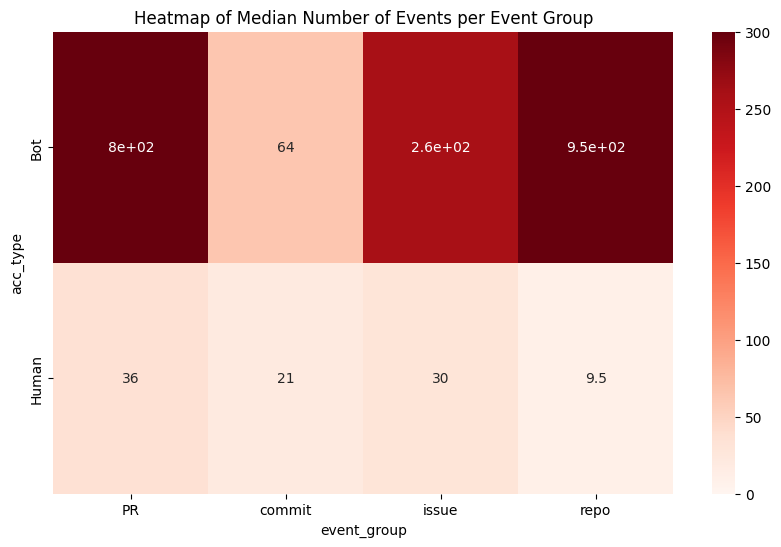

In [190]:
# 2. Tracer la carte thermique en utilisant seaborn avec une palette de couleurs allant du blanc au rouge
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, vmin=0, vmax=300, cmap="Reds")
plt.title('Heatmap of Median Number of Events per Event Group')
plt.show()

#### What is the difference that you observe between Bots+Bot actors and Humans?

Bots+Bot actors tend to have a higher median number of events in certain categories, particularly automated tasks such as creating pull requests and commenting on issues. In contrast, Humans have a more balanced distribution of events, with greater involvement in manual activities such as commits and issue discussions.

#### What is the differnce that you observe between Event groups?

Event groups show different levels of activity. For example, events related to pull requests and comments are often more frequent among Bots+Bot actors, while commits and issue discussions are more balanced between Bots and Humans

#### What is the difference that you observe between Bots+Bot actors and Humans and Event groups all considering at the same time?


Bots+Bot actors tend to be more active in automated tasks such as creating pull requests and commenting on issues. In contrast, Humans show a more balanced distribution of events, with greater involvement in manual activities such as commits and issue discussions. When considering event groups, it is observed that Bots+Bot actors primarily focus on automated events, while Humans participate more uniformly across different types of events.

### Question 3

#### Create boxen plots to visualise the distribution of number of events in each event group. 
#### For more information you can visit - https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot 
#### You should highlight the data points that correspond to bots using a stripplot in seaborn. https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial  
#### Interpret the results of the visualisation.

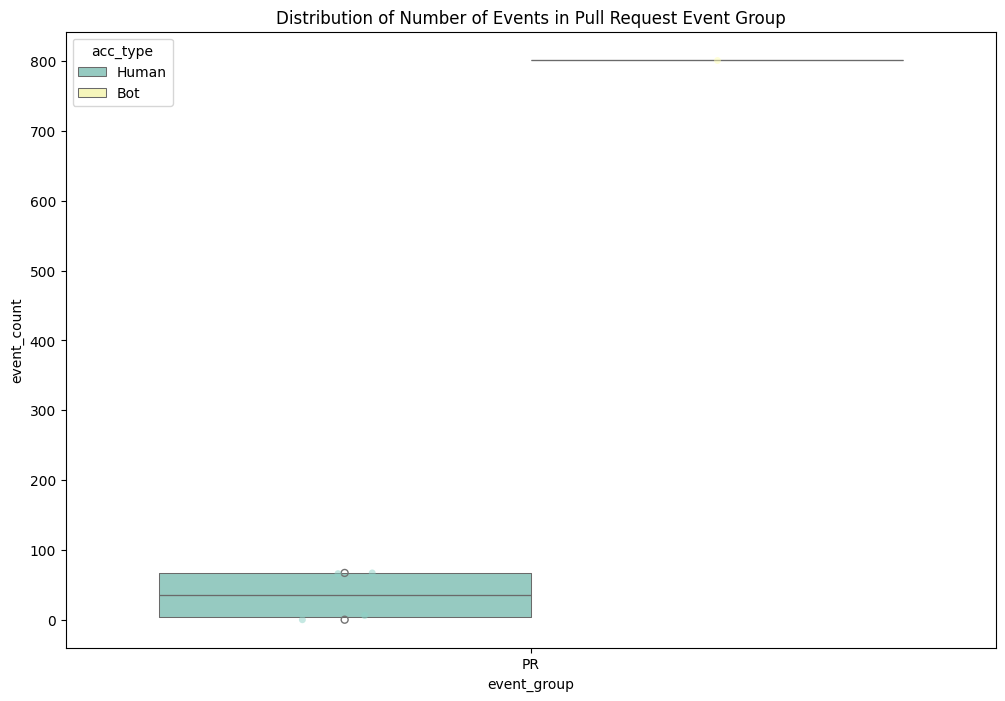

In [194]:
# YOUR CODE BELOW - Visualize number of events from pull request event group
pr_events = melted_df[melted_df['event_group'] == 'PR']

# 3. Créer les boxen plots pour visualiser la distribution du nombre d'événements dans le groupe 'PR'
plt.figure(figsize=(12, 8))
sns.boxenplot(x='event_group', y='event_count', hue='acc_type', data=pr_events, palette='Set3')

# 4. Ajouter les points de données correspondant aux bots en utilisant un stripplot
sns.stripplot(x='event_group', y='event_count', hue='acc_type', data=pr_events, dodge=True, marker='o', alpha=0.5, palette='Set3')

# Ajuster la légende pour éviter les doublons
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], title='acc_type')

# Ajouter un titre et afficher le graphique
plt.title('Distribution of Number of Events in Pull Request Event Group')
plt.show()

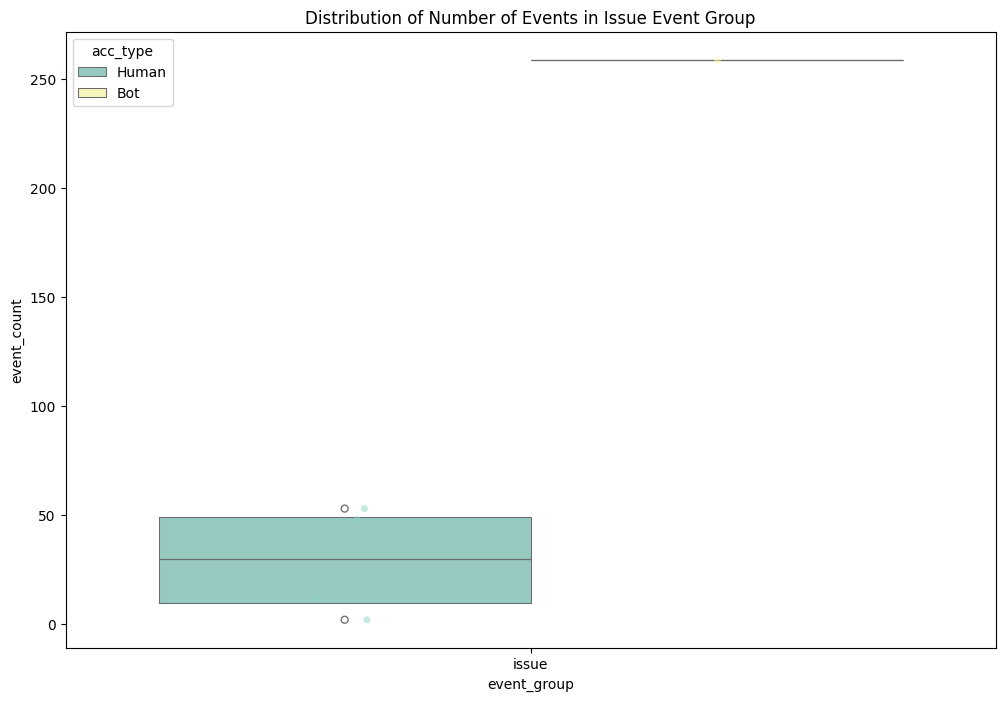

In [192]:
# YOUR CODE BELOW - Visualise number of events from issue event group
# Visualiser le nombre d'événements du groupe "issue"
issue_events = melted_df[melted_df['event_group'] == 'issue']

plt.figure(figsize=(12, 8))
sns.boxenplot(x='event_group', y='event_count', hue='acc_type', data=issue_events, palette='Set3')
sns.stripplot(x='event_group', y='event_count', hue='acc_type', data=issue_events, dodge=True, marker='o', alpha=0.5, palette='Set3')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], title='acc_type')

plt.title('Distribution of Number of Events in Issue Event Group')
plt.show()

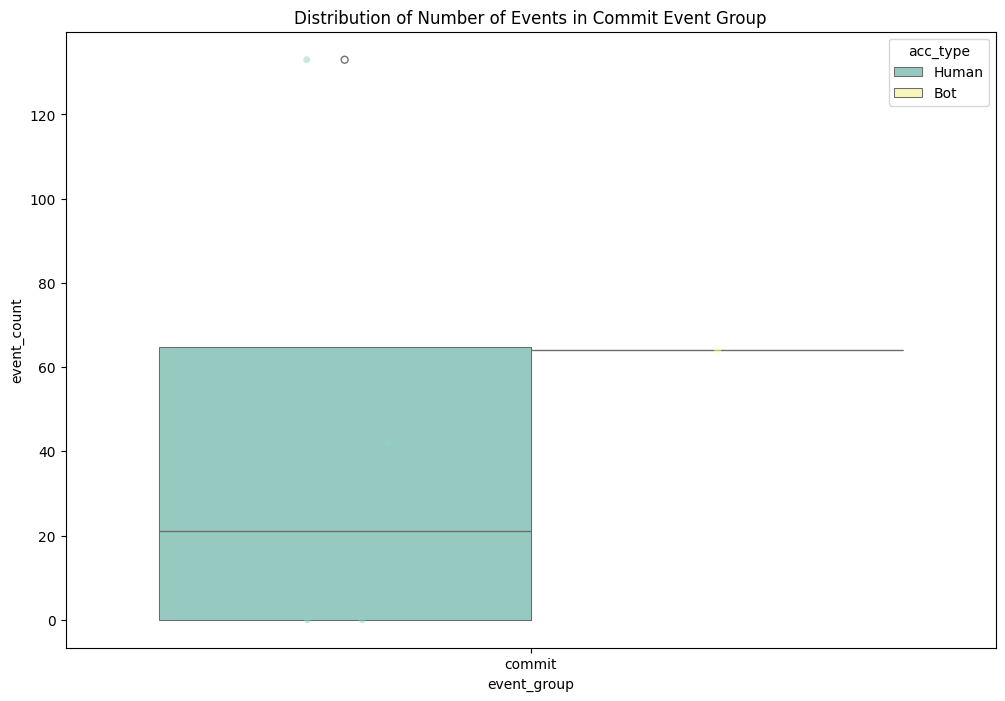

In [ ]:
# YOUR CODE BELOW - Visualise number of events from commit event group
# Visualiser le nombre d'événements du groupe "commit"
commit_events = melted_df[melted_df['event_group'] == 'commit']

plt.figure(figsize=(12, 8))
sns.boxenplot(x='event_group', y='event_count', hue='acc_type', data=commit_events, palette='Set3')
sns.stripplot(x='event_group', y='event_count', hue='acc_type', data=commit_events, dodge=True, marker='o', alpha=0.5, palette='Set3')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], title='acc_type')

plt.title('Distribution of Number of Events in Commit Event Group')
plt.show()

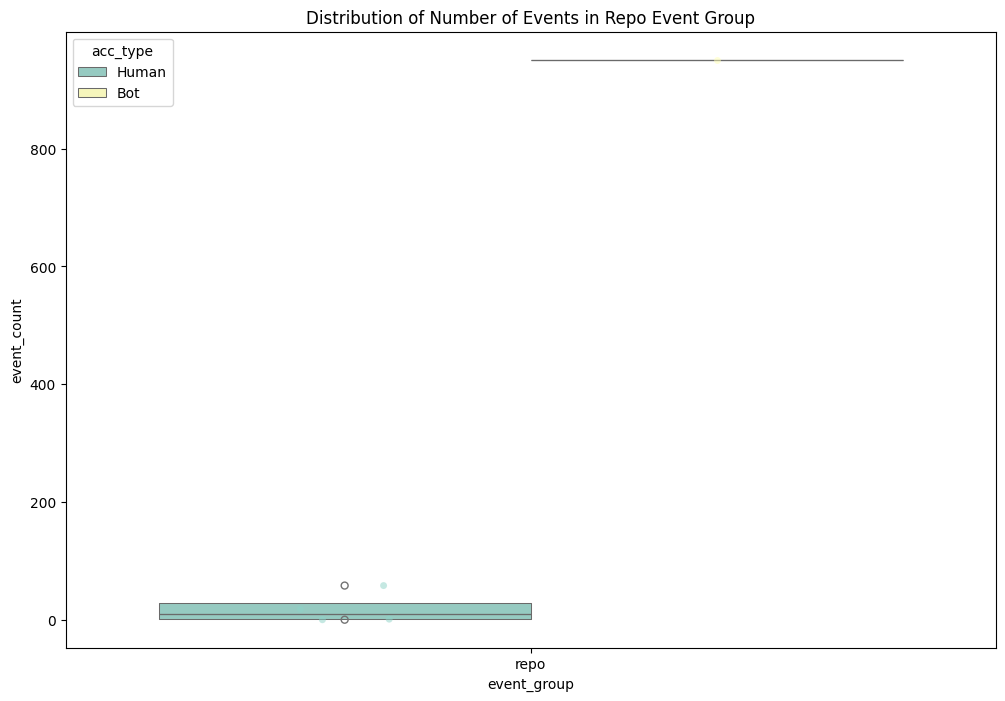

In [ ]:
# YOUR CODE BELOW - Visualise number of events from repo event group
# Visualiser le nombre d'événements du groupe "repo"
repo_events = melted_df[melted_df['event_group'] == 'repo']

plt.figure(figsize=(12, 8))
sns.boxenplot(x='event_group', y='event_count', hue='acc_type', data=repo_events, palette='Set3')
sns.stripplot(x='event_group', y='event_count', hue='acc_type', data=repo_events, dodge=True, marker='o', alpha=0.5, palette='Set3')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], title='acc_type')

plt.title('Distribution of Number of Events in Repo Event Group')
plt.show()

### Question 4.1

#### Statistical identify whether number of events in each event group is normally distributed or not.
#### Null hypothesis - $H_0$: Sample comes from the data that has normal distribution.
#### Use Shapiro-Wilk test for this purpose. Use the p-value with a threshold of 0.05 to determine whether $H_0$ can be rejected with statistical significance or not. 

#### Use shapiro from scipy.stats to perform this test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

In [195]:
# YOUR CODE BELOW
shapiro_results = {}

for group in event_groups:
    group_data = melted_df[melted_df['event_group'] == group]['event_count']
    stat, p_value = shapiro(group_data)
    shapiro_results[group] = {'statistic': stat, 'p_value': p_value, 'normal_distribution': p_value > 0.05}

# 3. Afficher les résultats du test de Shapiro-Wilk
for group, result in shapiro_results.items():
    print(f"Event Group: {group}")
    print(f"Shapiro-Wilk Statistic: {result['statistic']}")
    print(f"P-Value: {result['p_value']}")
    if result['normal_distribution']:
        print("The sample comes from a normal distribution (fail to reject H0).")
    else:
        print("The sample does not come from a normal distribution (reject H0).")
    print()

Event Group: PR
Shapiro-Wilk Statistic: 0.6316886072274058
P-Value: 0.001600259380616317
The sample does not come from a normal distribution (reject H0).

Event Group: commit
Shapiro-Wilk Statistic: 0.889382855186214
P-Value: 0.35400945197223604
The sample comes from a normal distribution (fail to reject H0).

Event Group: issue
Shapiro-Wilk Statistic: 0.7360323359100375
P-Value: 0.021983348737736285
The sample does not come from a normal distribution (reject H0).

Event Group: repo
Shapiro-Wilk Statistic: 0.5986447723802844
P-Value: 0.000601043735739443
The sample does not come from a normal distribution (reject H0).



### Question 4.2
#### Determine if there is any statistical diﬀerence in number of events between the identified event groups. Perform this test on all pairs of event groups. 
#### Null hypothesis - $H_0$: Any two event group come from the same population.
#### If $H_0$ is rejected in Shapiro-Wilk test (at least for one of the two event groups considered for test), use the Mann-Whitney U statistical test for this purpose. If $H_0$ is not rejected in Shapiro-Wilk test, use the independent t-test for this purpose.  
#### In any case, use the p-value with a threshold of 0.01 to determine whether $H_0$ can be rejected with statistical significance. 

#### Use mannwhitneyu from scipy.stats to perform Mann-Whitney U test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html) 
#### or 
#### ttest_ind from scipy.stats to perform independent t-test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.

#### More information:

You can pass the following arguments to mannwhitneyu from scipy.stats - (method='exact', nan_policy='omit'). For ttest_ind you can use - (nan_policy='omit')

In [196]:
# YOUR CODE BELOW

shapiro_results = {}

for group in event_groups:
    group_data = melted_df[melted_df['event_group'] == group]['event_count']
    stat, p_value = shapiro(group_data)
    shapiro_results[group] = {'statistic': stat, 'p_value': p_value, 'normal_distribution': p_value > 0.05}

# 3. Comparer les groupes d'événements par paires
comparison_results = []

for i in range(len(event_groups)):
    for j in range(i + 1, len(event_groups)):
        group1 = event_groups[i]
        group2 = event_groups[j]
        data1 = melted_df[melted_df['event_group'] == group1]['event_count']
        data2 = melted_df[melted_df['event_group'] == group2]['event_count']
        
        if not shapiro_results[group1]['normal_distribution'] or not shapiro_results[group2]['normal_distribution']:
            # Utiliser le test de Mann-Whitney U
            stat, p_value = mannwhitneyu(data1, data2, method='exact', nan_policy='omit')
            test_used = 'Mann-Whitney U'
        else:
            # Utiliser le test t indépendant
            stat, p_value = ttest_ind(data1, data2, nan_policy='omit')
            test_used = 'Independent t-test'
        
        comparison_results.append({
            'group1': group1,
            'group2': group2,
            'statistic': stat,
            'p_value': p_value,
            'test_used': test_used,
            'significant_difference': p_value < 0.01
        })

# 4. Afficher les résultats des comparaisons
for result in comparison_results:
    print(f"Comparison between {result['group1']} and {result['group2']}:")
    print(f"Test used: {result['test_used']}")
    print(f"Statistic: {result['statistic']}")
    print(f"P-Value: {result['p_value']}")
    if result['significant_difference']:
        print("There is a significant difference (reject H0).")
    else:
        print("There is no significant difference (fail to reject H0).")
    print()

Comparison between PR and commit:
Test used: Mann-Whitney U
Statistic: 16.0
P-Value: 0.5476190476190477
There is no significant difference (fail to reject H0).

Comparison between PR and issue:
Test used: Mann-Whitney U
Statistic: 14.0
P-Value: 0.8412698412698413
There is no significant difference (fail to reject H0).

Comparison between PR and repo:
Test used: Mann-Whitney U
Statistic: 14.5
P-Value: 0.8412698412698413
There is no significant difference (fail to reject H0).

Comparison between commit and issue:
Test used: Mann-Whitney U
Statistic: 10.0
P-Value: 0.6904761904761905
There is no significant difference (fail to reject H0).

Comparison between commit and repo:
Test used: Mann-Whitney U
Statistic: 12.0
P-Value: 1.0
There is no significant difference (fail to reject H0).

Comparison between issue and repo:
Test used: Mann-Whitney U
Statistic: 14.0
P-Value: 0.8412698412698413
There is no significant difference (fail to reject H0).



### Question 4.3
#### Each time you reject the null hypothesis $H_0$, quantify the effect size of the diﬀerence between the groups using cliﬀ’s delta ($\delta$). 
#### To calculate cliﬀ’s delta, you can pass the list of values to cliﬀ delta.py file given in the repository. E.g., cliffsDelta.cliffsDelta(list of values, list of values). This will return the effect size.
#### Refer to the table given in the TP document and mention your interpretation (negligible, small, medium, large).

In [197]:
# Supposons que comparison_results soit la liste des résultats des comparaisons entre les groupes d'événements

# 1. Calculer Cliff's Delta pour chaque paire de groupes d'événements lorsque l'hypothèse nulle est rejetée
for result in comparison_results:
    if result['significant_difference']:
        group1 = result['group1']
        group2 = result['group2']
        data1 = melted_df[melted_df['event_group'] == group1]['event_count']
        data2 = melted_df[melted_df['event_group'] == group2]['event_count']
        
        # Calculer Cliff's Delta
        delta, size = cliffsDelta.cliffsDelta(data1.tolist(), data2.tolist())
        
        # Ajouter les résultats de Cliff's Delta aux résultats de la comparaison
        result['cliffs_delta'] = delta
        result['effect_size'] = size

# 2. Afficher les résultats des comparaisons avec Cliff's Delta
for result in comparison_results:
    print(f"Comparison between {result['group1']} and {result['group2']}:")
    print(f"Test used: {result['test_used']}")
    print(f"Statistic: {result['statistic']}")
    print(f"P-Value: {result['p_value']}")
    if result['significant_difference']:
        print("There is a significant difference (reject H0).")
        print(f"Cliff's Delta: {result['cliffs_delta']}")
        print(f"Effect Size: {result['effect_size']}")
    else:
        print("There is no significant difference (fail to reject H0).")
    print()

Comparison between PR and commit:
Test used: Mann-Whitney U
Statistic: 16.0
P-Value: 0.5476190476190477
There is no significant difference (fail to reject H0).

Comparison between PR and issue:
Test used: Mann-Whitney U
Statistic: 14.0
P-Value: 0.8412698412698413
There is no significant difference (fail to reject H0).

Comparison between PR and repo:
Test used: Mann-Whitney U
Statistic: 14.5
P-Value: 0.8412698412698413
There is no significant difference (fail to reject H0).

Comparison between commit and issue:
Test used: Mann-Whitney U
Statistic: 10.0
P-Value: 0.6904761904761905
There is no significant difference (fail to reject H0).

Comparison between commit and repo:
Test used: Mann-Whitney U
Statistic: 12.0
P-Value: 1.0
There is no significant difference (fail to reject H0).

Comparison between issue and repo:
Test used: Mann-Whitney U
Statistic: 14.0
P-Value: 0.8412698412698413
There is no significant difference (fail to reject H0).

